## Studing city mobility and users whereabouts

**Lecturer: Dr. Riccardo Di Clemente**, University of Exeter
mailto:r.di-clemente@exeter.ac.uk
www.ricccardodiclemente.com

**Exeter Summer School in Urban Analytics, 26th-30th July 2021**
Day 3 - Lab on Urban Mobility


This notebook are a collection of some exercises on human mobility using a GPS trajectory dataset was collected in (Microsoft Research Asia) Geolife project some users in a period of over three years (from April 2007 to August 2012). Last published: August 9, 2012.
https://www.microsoft.com/en-us/download/details.aspx?id=52367.

The data needed for this notebook is a subset of the original dataset.
The file name is 'geolife_sample_mini.csv'


The first part of the notebook is inspired by the tutorial of scikit mobility.

**scikit-mobility** is publicly available on GitHub at the following link: https://scikit-mobility.github.io/scikit-mobility/. The documentation describing all the classes and functions of scikit-mobility is available at https://scikit-mobility.github.io/scikit-mobility/.
Authors:
**Luca Pappalardo**, ISTI-CNR, Italy
**Filippo Simini**, University of Bristol, UK
**Gianni Barlacchi**, FBK, Italy and Amazon, Germany
**Roberto Pellungrini**, University of Pisa, Italy


You can find the publicaton linked to the github library here https://arxiv.org/abs/1907.07062 

In [1]:
#import the needed libraries
import skmob
import geopandas as gpd
from skmob.preprocessing import detection, clustering
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [108]:
#loading data data
tdf = skmob.TrajDataFrame.from_file('geolife_sample_mini.csv')
tdf

,lat,lng,datetime,uid
0,39.974292,116.399592,2009-01-03 01:21:35,135
1,39.974309,116.399523,2009-01-03 01:21:36,135
2,39.974320,116.399588,2009-01-03 01:21:38,135
3,39.974365,116.399730,2009-01-03 01:21:39,135
4,39.974391,116.399782,2009-01-03 01:21:42,135
...,...,...,...,...
1387383,39.973342,116.331822,2009-03-07 01:43:43,343
1387384,39.973344,116.331795,2009-03-07 01:43:48,343
1387385,39.973362,116.331783,2009-03-07 01:43:53,343
1387386,39.973414,116.331785,2009-03-07 01:43:58,343


In [136]:
import datetime
b = datetime.datetime([2009, 1, 3, 1, 21, 35])
print(b)

TypeError: an integer is required (got type list)

In [149]:
pd

<module 'pandas' from 'C:\\Users\\cj413\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\pandas\\__init__.py'>

In [138]:
def to_datetime(x):
    date = [int(d) for d in x[0].split('-')]
    hour = [int(h) for h in x[1].split(':')]
    return datetime.datetime(date[0], date[1], date[2], hour[0], hour[1], hour[2])

In [145]:
f = 'C:/Users/cj413/Downloads/Geolife Trajectories 1.3/Data/000/Trajectory/20081023025304.plt'
tdf = skmob.TrajDataFrame.from_file(f)
tdf['datetime'] = tdf[['2008-10-23', '02:53:04']].apply(lambda x: to_datetime(x), axis=1)
tdf = tdf.rename(columns={"39.984702": "lat", "116.318417": "lng", "0":"uid"})
tdf

,lat,lng,uid,492,39744.1201851852,2008-10-23,02:53:04,datetime
0,39.984683,116.318450,0,492,39744.120255,2008-10-23,02:53:10,2008-10-23 02:53:10
1,39.984686,116.318417,0,492,39744.120313,2008-10-23,02:53:15,2008-10-23 02:53:15
2,39.984688,116.318385,0,492,39744.120370,2008-10-23,02:53:20,2008-10-23 02:53:20
3,39.984655,116.318263,0,492,39744.120428,2008-10-23,02:53:25,2008-10-23 02:53:25
4,39.984611,116.318026,0,493,39744.120486,2008-10-23,02:53:30,2008-10-23 02:53:30
...,...,...,...,...,...,...,...,...
902,40.009172,116.321211,0,88,39744.465880,2008-10-23,11:10:52,2008-10-23 11:10:52
903,40.009204,116.321130,0,86,39744.465937,2008-10-23,11:10:57,2008-10-23 11:10:57
904,40.009243,116.321050,0,85,39744.465995,2008-10-23,11:11:02,2008-10-23 11:11:02
905,40.009269,116.320978,0,84,39744.466053,2008-10-23,11:11:07,2008-10-23 11:11:07


In [174]:
tdf.groupby(['uid', 'date', 'time']).mean()

lat         lng  alt          days
uid date       time                                              
0   2008-10-23 02:53:04  39.984702  116.318417  492  39744.120185
               02:53:10  39.984683  116.318450  492  39744.120255
               02:53:15  39.984686  116.318417  492  39744.120313
               02:53:20  39.984688  116.318385  492  39744.120370
               02:53:25  39.984655  116.318263  492  39744.120428
...                            ...         ...  ...           ...
               11:10:52  40.009172  116.321211   88  39744.465880
               11:10:57  40.009204  116.321130   86  39744.465937
               11:11:02  40.009243  116.321050   85  39744.465995
               11:11:07  40.009269  116.320978   84  39744.466053
               11:11:12  40.009328  116.320887   83  39744.466111

[908 rows x 4 columns]

In [168]:
df = pd.read_csv(f, names=['lat', 'long', 'user', 'alt', 'days', 'date', 'time'], index_col=False)
df['datetime'] = df[['date', 'time']].apply(lambda x: to_datetime(x), axis=1)
tdf = skmob.TrajDataFrame(df, latitude='lat', longitude ='long', user_id='user',
                         datetime='datetime')
tdf


,lat,lng,uid,alt,days,date,time,datetime
0,39.984702,116.318417,0,492,39744.120185,2008-10-23,02:53:04,2008-10-23 02:53:04
1,39.984683,116.318450,0,492,39744.120255,2008-10-23,02:53:10,2008-10-23 02:53:10
2,39.984686,116.318417,0,492,39744.120313,2008-10-23,02:53:15,2008-10-23 02:53:15
3,39.984688,116.318385,0,492,39744.120370,2008-10-23,02:53:20,2008-10-23 02:53:20
4,39.984655,116.318263,0,492,39744.120428,2008-10-23,02:53:25,2008-10-23 02:53:25
...,...,...,...,...,...,...,...,...
903,40.009172,116.321211,0,88,39744.465880,2008-10-23,11:10:52,2008-10-23 11:10:52
904,40.009204,116.321130,0,86,39744.465937,2008-10-23,11:10:57,2008-10-23 11:10:57
905,40.009243,116.321050,0,85,39744.465995,2008-10-23,11:11:02,2008-10-23 11:11:02
906,40.009269,116.320978,0,84,39744.466053,2008-10-23,11:11:07,2008-10-23 11:11:07


In [ ]:
# f = 'C:/Users/cj413/Downloads/Geolife Trajectories 1.3/Data/000/Trajectory/20081023025304.plt'
# df = pd.read_csv(f, head=[])
# tdf = skmob.TrajDataFrame.from_file(f)
# tdf['datetime'] = tdf[['2008-10-23', '02:53:04']].apply(lambda x: to_datetime(x), axis=1)
# tdf = tdf.rename(columns={"39.984702": "lat", "116.318417": "lng", "0":"uid"})
# tdf

In [83]:
# tdf=tdf[(tdf['lat']<40.35) & (tdf['lat']>39.7)]
# tdf=tdf[(tdf['lng']<116.8) & (tdf['lng']>116)]
# tdf['lng'].min()

In [84]:
#Since the dataset has some position outside the city we want to filter the data.
#in this way we can simplify the analysis

# tdf=tdf[(tdf['lat']<36.) & (tdf['lat']>34.)]
# tdf=tdf[(tdf['lng']<110) & (tdf['lng']>108)]
# tdf

,lat,lng,datetime,uid
518400,34.258638,108.991897,2008-05-09 23:49:00,172
518401,34.258400,108.991885,2008-05-09 23:49:02,172
518402,34.258112,108.991945,2008-05-09 23:49:04,172
518403,34.257808,108.992017,2008-05-09 23:49:06,172
518404,34.257553,108.992042,2008-05-09 23:49:08,172
...,...,...,...,...
547864,34.269777,108.990943,2008-05-09 11:18:14,172
547865,34.269795,108.990967,2008-05-09 11:18:19,172
547866,34.269737,108.990703,2008-05-09 11:18:24,172
547867,34.269722,108.990475,2008-05-09 11:18:29,172


In [163]:
#check uid left
users_id=list(set(tdf.uid))
users_id

[0]

In [164]:
tdf.crs 

{'init': 'epsg:4326'}

In [166]:
#plot a trajectory
map_f = tdf.plot_trajectory(max_users=1, start_end_markers=False)
map_f

Some points in a trajectory can represent Point-Of-Interests (POIs) such as schools, restau-rants, and bars, or they can represent user-specific places such as home and work locations. These points are usually called Stay Points or Stops, and they can be detected in different ways. A common approach is to apply spatial clustering algorithms to cluster trajectory points by looking at their spatial proximity (Hariharan and Toyama 2004). In scikit-mobility, the stops function, contained in the detection module, finds the stay points visited by an object. For instance, to identify the stops where the object spent at least minutes_for_a_stop minutes within a distance spatial_radius_km \times stop_radius_factor, from a given point, we can use the following code:

In [167]:
#stop detection
stdf = detection.stops(tdf)

cstdf = clustering.cluster(stdf)
cstdf.plot_stops(max_users=1, map_f=map_f)

C:\Users\cj413\AppData\Local\Continuum\anaconda3\lib\site-packages\skmob\utils\plot.py:319: UserWarning: Only the stops of the first 10 users will be plotted. Use the argument `max_users` to specify the desired number of users, or filter the TrajDataFrame.
  warnings.warn("Only the stops of the first 10 users will be plotted. Use the argument `max_users` to specify the desired number of users, or filter the TrajDataFrame.")


## Stops Analysis

Now we want to analyze better the stops!
We will define the stops time as lenght of the stops,  and study the stop-time distribution.


In [88]:

#Define the stop-time
stops_all=(cstdf.leaving_datetime-cstdf.datetime).iloc()

#convert in seconds
minutes_stops=[k.seconds/60. for k in stops_all]

In [89]:
a=stops_all[0]

(10, 1020)

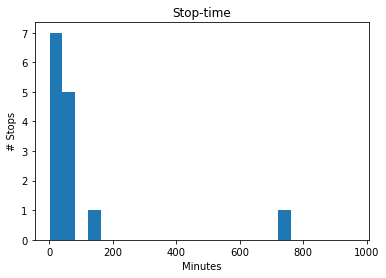

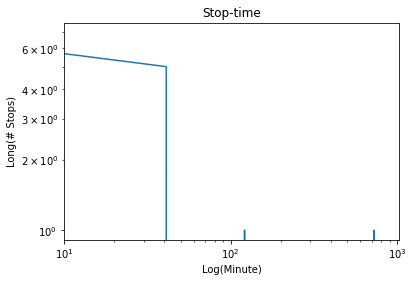

In [90]:
#Plots the stop time

bbins=np.arange(1,1000,40)
plt.figure()
plt.hist(minutes_stops,bins=bbins)
plt.ylabel('# Stops')
plt.xlabel('Minutes')
plt.title('Stop-time')



plt.figure()
[a,b]=np.histogram(minutes_stops,bins=bbins)
plt.plot(b[:-1],a)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Log(Minute)')
plt.ylabel('Long(# Stops)')
plt.title('Stop-time')
plt.xlim(10,1020)


# Plot Users' Diary

The `TrajDataFrame`'s method `plot_diary` plots the time series of the locations visited by an object. If the column `uid` is present, one object identifier must be specified via the argument `user`. This method requires a `TrajDataFrame` with the column `constants.CLUSTER`, which is created by the *scikit-mobility* functions to cluster stops.

The plot displays time on the *x* axis and shows a series of rectangles of different colors that represent the object's visits to the various stops. The length of a rectangle denotes the duration of the visit: the left edge marks the arrival time, the right edge marks the leaving time. The color of a rectangle denotes the stop's cluster: visits to stops that belong to the same cluster have the same color (the color code is consistent with the one used by the method `plot_stops`). A white rectangle indicates that the object is moving. We show below an example of a plot generated by the `plot_diary` method:

In [91]:
#defining the user list
users_id=list(set(tdf.uid))

<AxesSubplot:title={'center':'user 172'}>

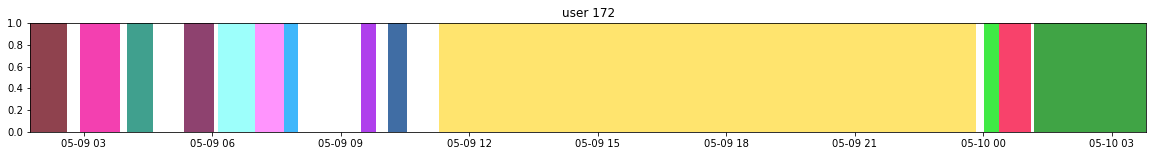

In [93]:
cstdf.plot_diary(users_id[0])
# cstdf.plot_diary(users_id[3], legend=True)

In [95]:
#the dataset of the stops
cstdf

,lat,lng,datetime,uid,leaving_datetime,cluster
0,34.365512,109.211860,2008-05-09 01:44:59,172,2008-05-09 02:13:40,0
1,34.365830,109.211952,2008-05-09 02:13:40,172,2008-05-09 02:36:34,0
2,34.364332,109.207722,2008-05-09 02:54:04,172,2008-05-09 03:51:10,12
3,34.372270,109.213962,2008-05-09 04:01:14,172,2008-05-09 04:36:20,11
4,34.389620,109.278526,2008-05-09 05:21:05,172,2008-05-09 06:02:28,10
5,34.385138,109.275533,2008-05-09 06:07:58,172,2008-05-09 06:59:08,9
6,34.384813,109.274237,2008-05-09 06:59:08,172,2008-05-09 07:40:15,8
7,34.385473,109.272730,2008-05-09 07:40:15,172,2008-05-09 08:00:23,7
8,34.359815,109.208728,2008-05-09 09:27:44,172,2008-05-09 09:48:40,6
9,34.362082,109.211034,2008-05-09 10:05:45,172,2008-05-09 10:33:02,5


# Users Similarities

Now we want to study the similarities in the travel dairies.

We will first need to aggregate the users centroid usign DBSCAN, to define the city cluster locations.

Then we will compare the visitation patterns of the city cluster locations among differt users.

In [96]:
#load the stops' centroids
centroid_clusters=cstdf.groupby(['uid','cluster']).mean().reset_index()

(116.0, 116.8)

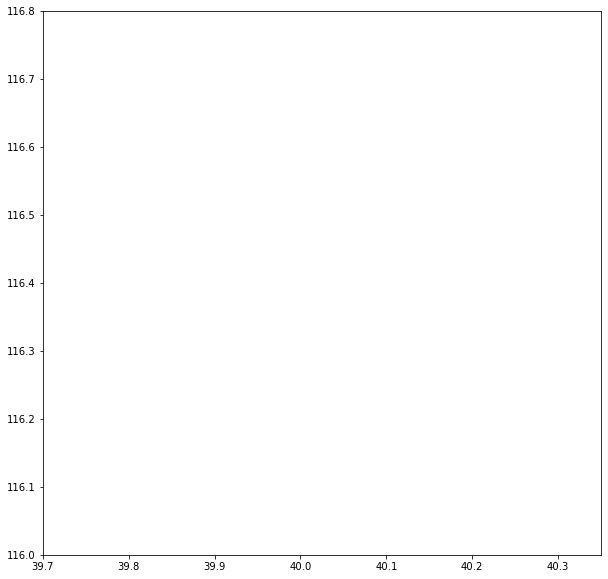

In [97]:
#plots the centroids
plt.figure(figsize=(10,10))
plt.plot(centroid_clusters['lat'],centroid_clusters['lng'],'.',alpha=0.3)
plt.xlim(39.7,40.35)
plt.ylim(116,116.8)

(116.0, 116.8)

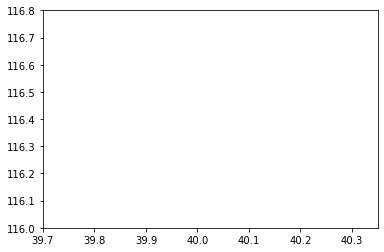

In [98]:
from sklearn.cluster import DBSCAN

#we are usign DBSCAN to cluster the centroids in order to compare the visiting patterns.

X=centroid_clusters[['lat','lng']].to_numpy()
db = DBSCAN(eps=20/6371., min_samples=2, algorithm='ball_tree', metric='haversine').fit(np.radians(X))

cluster_city = db.fit_predict(X)

plt.scatter(centroid_clusters['lat'],centroid_clusters['lng'], c=cluster_city,alpha=0.5 )
plt.xlim(39.7,40.35)
plt.ylim(116,116.8)

In [99]:
#We define the users city stop clusters

centroid_clusters['cluster_city']=cluster_city
centorid_clusters=centroid_clusters[centroid_clusters.cluster_city>-1]
users_city_stops=centroid_clusters.groupby(['uid'])['cluster_city'].unique().to_dict()

In [100]:
#We plot the matrix of users similarities.

users_stops=list(users_city_stops.keys())
similarity_matrix=np.zeros((len(users_stops),len(users_stops)))


for idX in range(0,len(users_stops)):
    for idY in range(0,idX):
        stop_u1=users_city_stops[users_stops[idX]]
        stop_u2=users_city_stops[users_stops[idY]]
        similarity_matrix[idX,idY]=len(set(stop_u1).intersection(stop_u2))
        similarity_matrix[idY,idX]=similarity_matrix[idX,idY]

Text(0, 0.5, 'Similarity index')

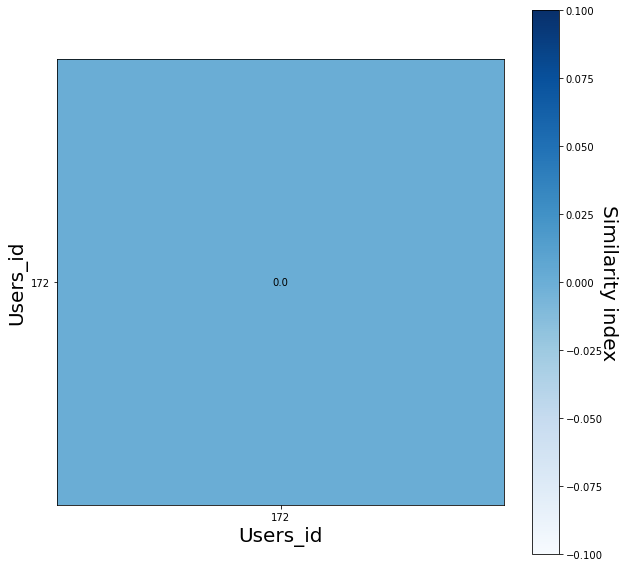

In [101]:


fig, ax = plt.subplots(figsize=(10,10))

min_val, max_val = 0, 15



map_sim=ax.matshow(similarity_matrix, cmap=plt.cm.Blues)

for i in range(len(users_stops)):
    for j in range(len(users_stops)):
        c = similarity_matrix[j,i]
        ax.text(i, j, str(c), va='center', ha='center')
        
        

#Plots aesthetics.
user_id_label={str(k) for k in users_stops}
ax.tick_params(axis="x", bottom=True, top=False, labelbottom=True, labeltop=False)
ax.set_xticks(range(0,len(users_stops)))
ax.set_xticklabels(user_id_label)
ax.set_yticks(range(0,len(users_stops)))
ax.set_yticklabels(user_id_label)
ax.set_xlabel('Users_id',fontsize=20)
ax.set_ylabel('Users_id',fontsize=20)
cbar=fig.colorbar(map_sim, ax=ax)
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('Similarity index', rotation=270,fontsize=20)